Problem Statement 1:

A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
X number of months/years.

Dataset Information:

The walmart.csv contains 6435 rows and 8 columns.
* Feature Name Description
* Store Store number
* Date Week of Sales
* Weekly_Sales Sales for the given store in that week
* Holiday_Flag If it is a holiday week
* Temperature Temperature on the day of the sale
* Fuel_Price Cost of the fuel in the region
* CPI Consumer Price Index
* Unemployment Unemployment Rat

1. Using the above data, come up with useful insights that can be used by each of the stores to improve in various areas.
2. Forecast the sales for each store for the next 12 weeks.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
data = pd.read_csv(r'B:\MY COMPUTER (HOME)\2 IT\Intellipaat course\Capstone\Walmart (1).csv')

In [3]:
#EDA on the time series data 
data.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [4]:
data.shape

(6435, 8)

In [34]:
data.Date=pd.to_datetime(data.Date)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specif

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [37]:
# Extract new columns
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week
data['Day'] = data['Date'].dt.day
data['Year'] = data['Date'].dt.year

C:\Users\Admin\AppData\Local\Temp\ipykernel_10680\3315171318.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


In [38]:
data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Month  Week  Day  Year  
0  211.096358         8.106      5    17    2  2010  
1  211.242170         8.106     12    48    2  2010  
2  211.289143         8.106      2     7   19  2010  
3  211.319643         8.106      2     8   26  2010  
4  211.350143         8.106      5    18    3  2010

In [5]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

**Function to create barplots that indicate percentage for each category**

In [39]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

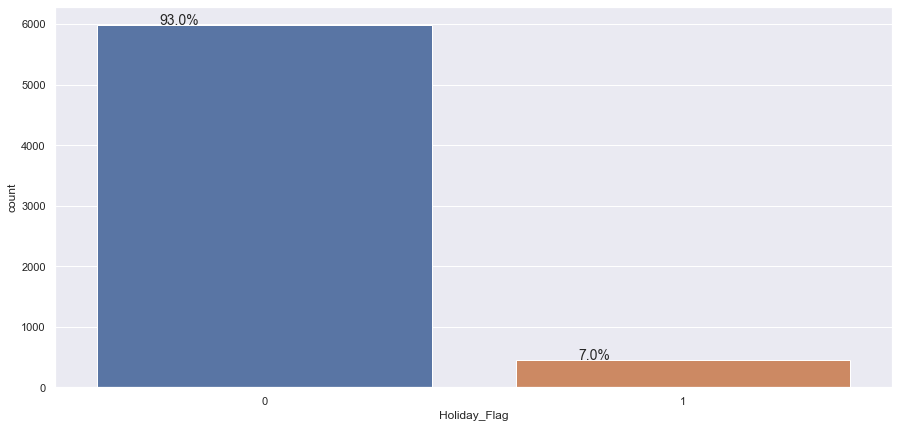

In [15]:
perc_on_bar(data[data.columns[3]])

- 93% of consumers are from no holiday flag category and rest from holiday flag

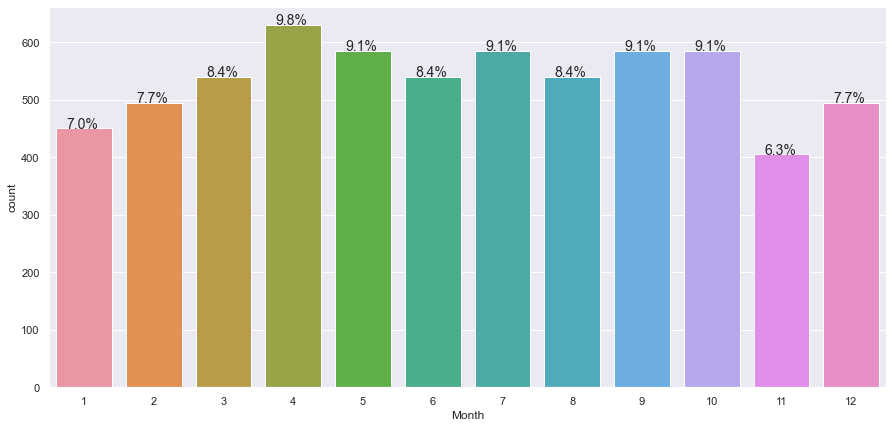

In [40]:
perc_on_bar(data[data.columns[8]])

- Above graph gives monthwise distribution

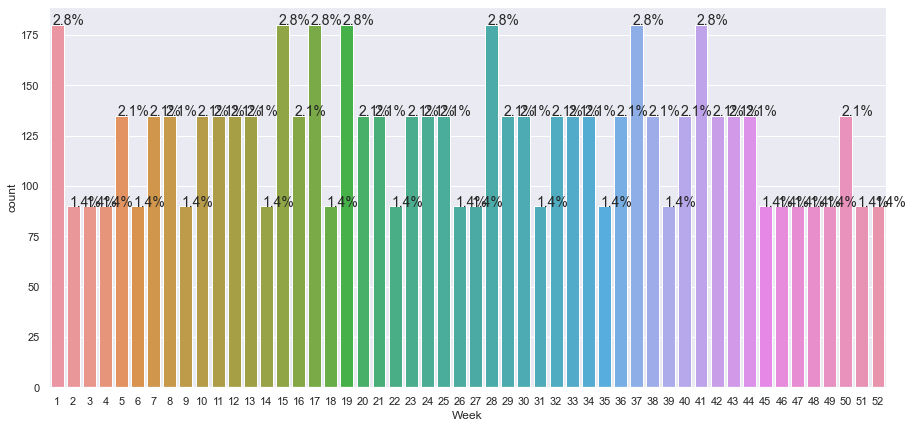

In [41]:
perc_on_bar(data[data.columns[9]])

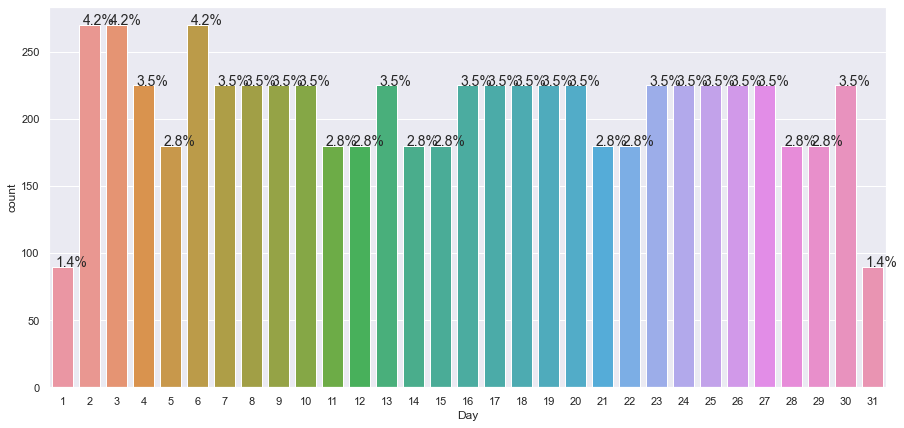

In [42]:
perc_on_bar(data[data.columns[10]])

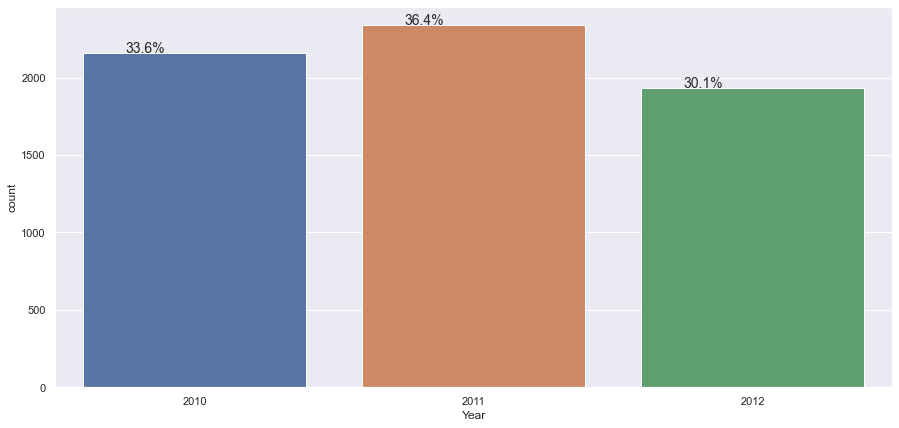

In [43]:
perc_on_bar(data[data.columns[11]])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Store', ylabel='Density'>

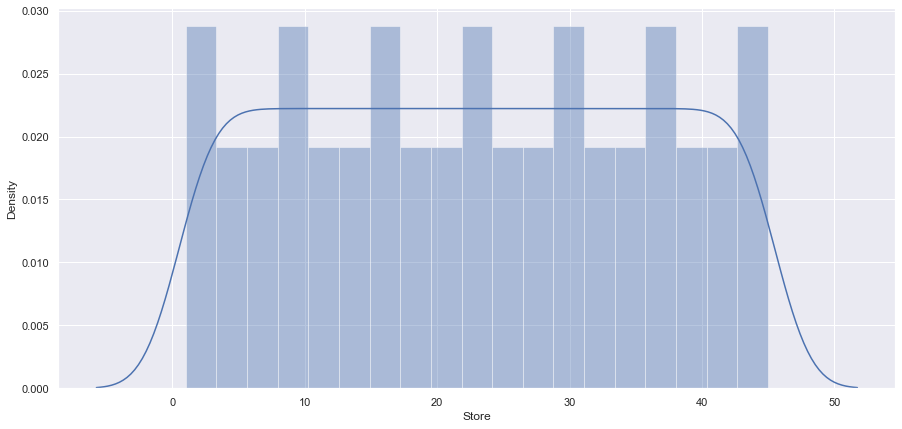

In [22]:
sns.distplot(data[data.columns[0]])


- The above graph gives even distribution of records from all stores.

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

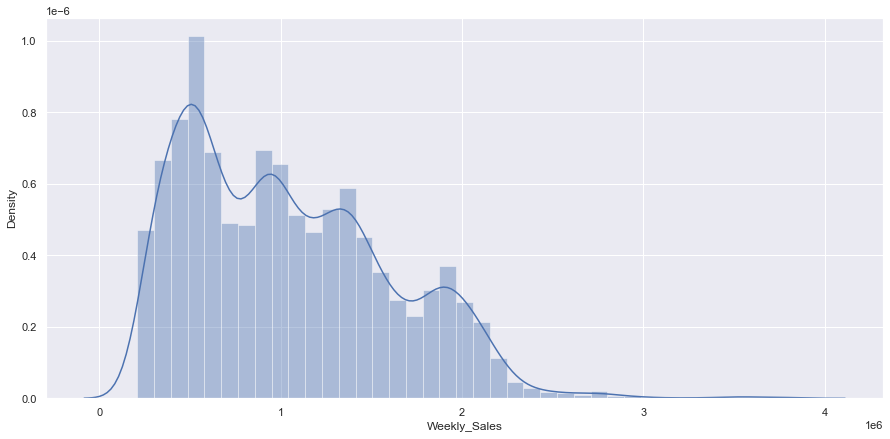

In [24]:
sns.distplot(data[data.columns[2]])


- The above graph shows that the Weekly_sales data distribution is positive skewed i.e. outliers are at right side of the data.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

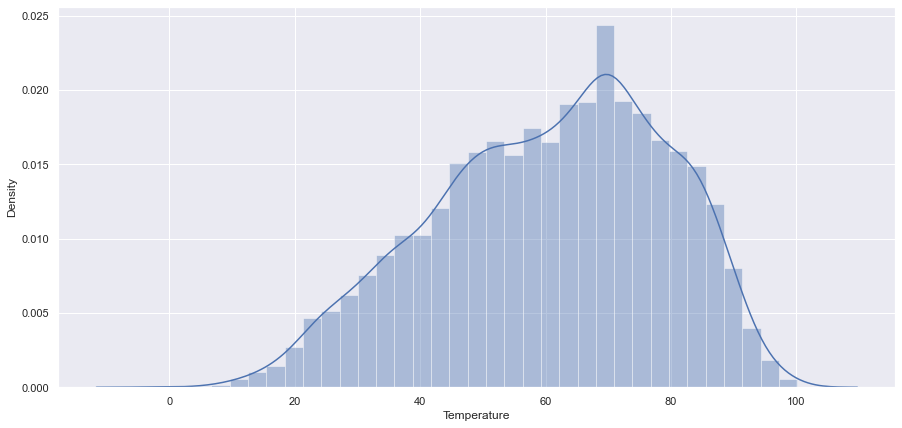

In [26]:
sns.distplot(data[data.columns[4]])


- The above graph shows that the Temperature data is nearly normally distributed.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fuel_Price', ylabel='Density'>

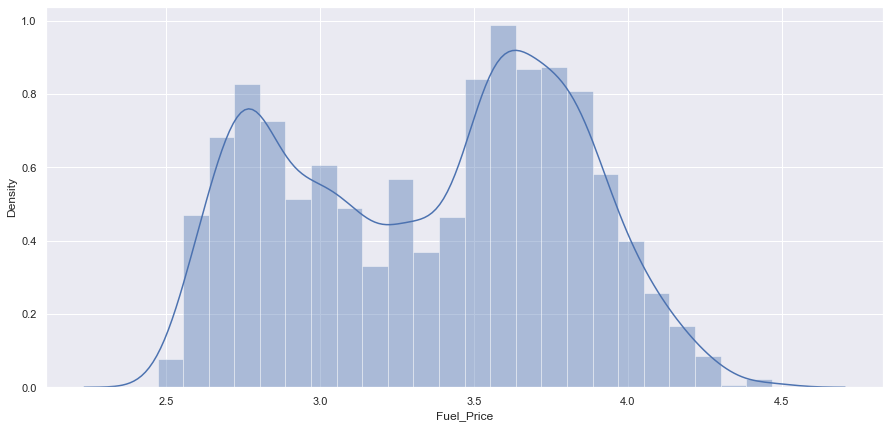

In [27]:
sns.distplot(data[data.columns[5]])


- In fuel price variable data, there's presence of some peaks and lows.
- Peaks are at fuel price= 2.8 and 3.6
- Lowest fuel price at <=2.5 and >4.3
- Optimal fuel price=2.6 to 3.1 or 3.5 to 3.9

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPI', ylabel='Density'>

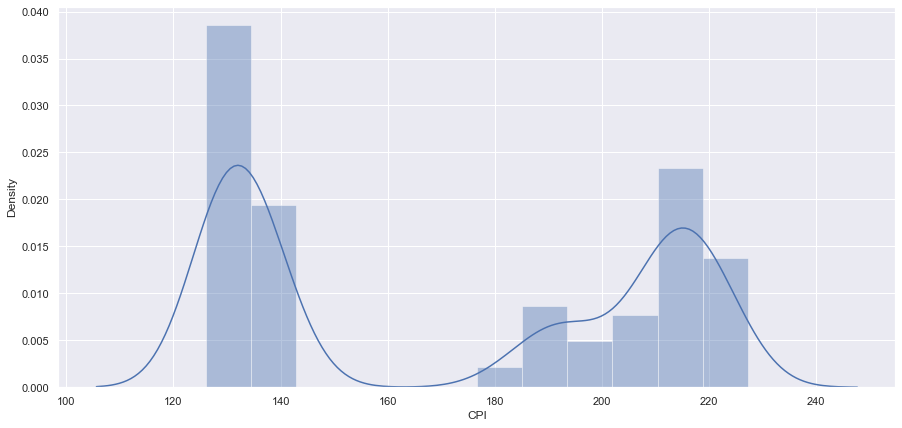

In [29]:
sns.distplot(data[data.columns[6]])


- From the graph, we can see that the data distribution of CPI is uneven and assymmetric.
- CPI at 130 is Peak and followed by 210.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unemployment', ylabel='Density'>

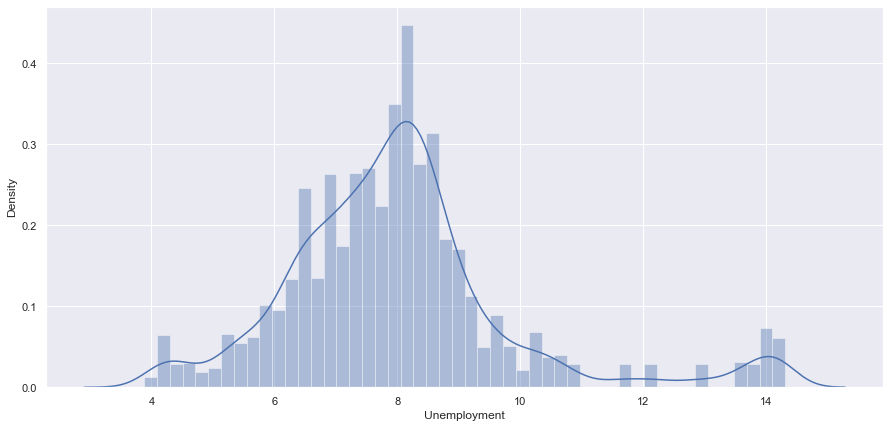

In [30]:
sns.distplot(data[data.columns[7]])


- Unemplyment data distribution is looks like normal and peak rate at 8.

In [17]:
data.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [107]:
data[data.duplicated()]

Empty DataFrame
Columns: [Store, Weekly_Sales]
Index: []

In [108]:
data.isnull().sum()

Store           0
Weekly_Sales    0
dtype: int64

In [6]:
col=['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
data.drop(columns=col, inplace=True)
data.head()

Store        Date  Weekly_Sales
0      1  05-02-2010    1643690.90
1      1  12-02-2010    1641957.44
2      1  19-02-2010    1611968.17
3      1  26-02-2010    1409727.59
4      1  05-03-2010    1554806.68

In [7]:
data.describe()

Store  Weekly_Sales
count  6435.000000  6.435000e+03
mean     23.000000  1.046965e+06
std      12.988182  5.643666e+05
min       1.000000  2.099862e+05
25%      12.000000  5.533501e+05
50%      23.000000  9.607460e+05
75%      34.000000  1.420159e+06
max      45.000000  3.818686e+06

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 150.9+ KB


In [9]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specif

Store       Date  Weekly_Sales
0      1 2010-05-02    1643690.90
1      1 2010-12-02    1641957.44
2      1 2010-02-19    1611968.17
3      1 2010-02-26    1409727.59
4      1 2010-05-03    1554806.68

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Month         6435 non-null   int64         
 9   Week          6435 non-null   int64         
 10  Day           6435 non-null   int64         
 11  Year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 603.4 KB


In [45]:
data.index = data['Date']
data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  \
Date                                                                    
2010-05-02      1 2010-05-02    1643690.90             0        42.31   
2010-12-02      1 2010-12-02    1641957.44             1        38.51   
2010-02-19      1 2010-02-19    1611968.17             0        39.93   
2010-02-26      1 2010-02-26    1409727.59             0        46.63   
2010-05-03      1 2010-05-03    1554806.68             0        46.50   

            Fuel_Price         CPI  Unemployment  Month  Week  Day  Year  
Date                                                                      
2010-05-02       2.572  211.096358         8.106      5    17    2  2010  
2010-12-02       2.548  211.242170         8.106     12    48    2  2010  
2010-02-19       2.514  211.289143         8.106      2     7   19  2010  
2010-02-26       2.561  211.319643         8.106      2     8   26  2010  
2010-05-03       2.625  211.350143         8.106      5    18    3  2010

In [46]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Week', 'Day', 'Year'],
      dtype='object')

In [47]:
data.drop(['Date', 'Holiday_Flag', 'Temperature','Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Week', 'Day', 'Year'], inplace=True, axis=1)

In [48]:
df=data.copy()
df.head()

Store  Weekly_Sales
Date                           
2010-05-02      1    1643690.90
2010-12-02      1    1641957.44
2010-02-19      1    1611968.17
2010-02-26      1    1409727.59
2010-05-03      1    1554806.68

In [49]:
df = df.groupby('Store')['Weekly_Sales'].resample('W').sum().reset_index()
df.head()

Store       Date  Weekly_Sales
0      1 2010-01-10    1453329.50
1      1 2010-01-17          0.00
2      1 2010-01-24          0.00
3      1 2010-01-31          0.00
4      1 2010-02-07    3087386.42

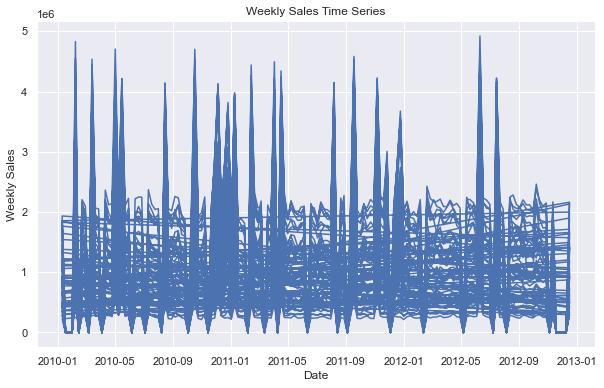

In [50]:
# Visualize the data
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Weekly_Sales'])
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Time Series')
plt.show()

In [51]:
data.shape

(6435, 2)

In [52]:
df.shape

(6930, 3)

In [53]:
mean_log = df.rolling(window=24).mean()
std_log = df.rolling(window=24).std()


C:\Users\Admin\AppData\Local\Temp\ipykernel_10680\4225590131.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  mean_log = df.rolling(window=24).mean()
C:\Users\Admin\AppData\Local\Temp\ipykernel_10680\4225590131.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  std_log = df.rolling(window=24).std()


In [54]:
mean_log

Store   Weekly_Sales
0       NaN            NaN
1       NaN            NaN
2       NaN            NaN
3       NaN            NaN
4       NaN            NaN
...     ...            ...
6925   45.0  699879.444583
6926   45.0  627261.089167
6927   45.0  593031.998333
6928   45.0  558758.283333
6929   45.0  557137.310417

[6930 rows x 2 columns]

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

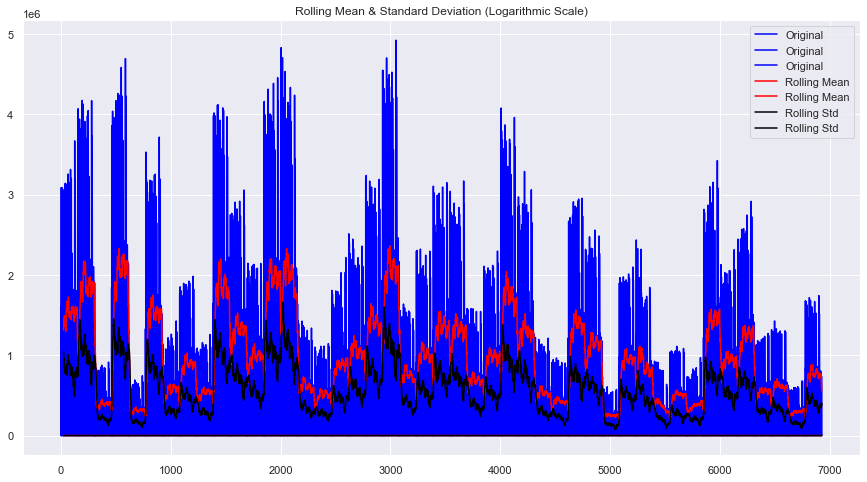

In [55]:
plt.figure(figsize=(15,8))
plt.plot(df, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

Before building a time series model, we need to make sure that the time series is stationary. If the time series is non-stationary, then we need to make it stationary by differencing the data. The number of times we take a difference of the data is a parameter used in ARIMA models, which we will see shortly.

Non-stationarity in time series may appear for the following reasons:

Presence of a trend in the data
Presence of heteroskedasticity
Presence of autocorrelation
We can identify non-stationarity in the time series by performing a statistical test called the Augmented Dicky-Fuller Test.

Null Hypothesis: The time series is non stationary
Alternate Hypothesis: The time series is stationary

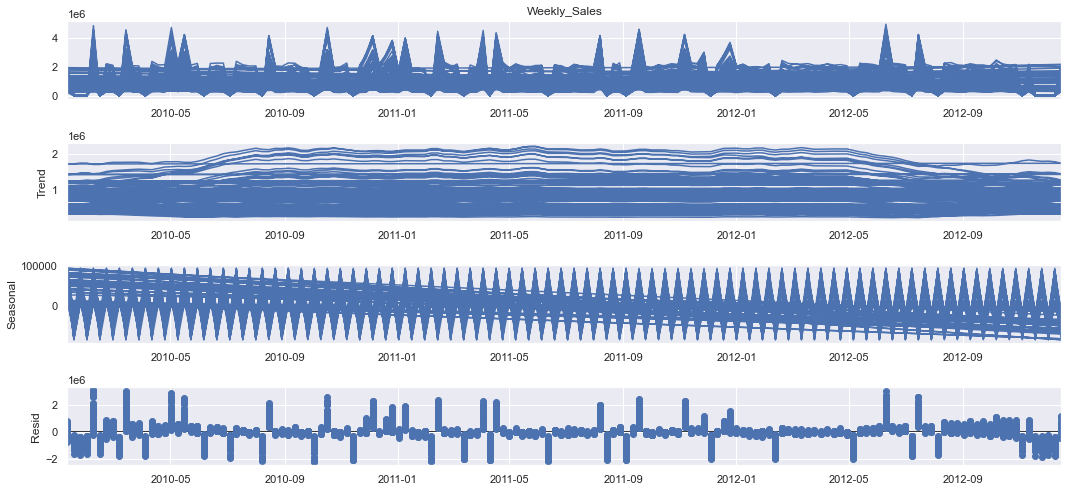

In [56]:
# Decompose the time series
decomp = seasonal_decompose(df.set_index('Date')['Weekly_Sales'], model='additive', period=52)
decomp.plot()
plt.show()

In [57]:
#checking the stationarity of the series 
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Weekly_Sales'])
print(result)

(-4.271877492385144, 0.0004967495160230731, 35, 6894, {'1%': -3.4312989028926917, '5%': -2.861959337829954, '10%': -2.5669932096686625}, 202908.91492693688)


In [58]:
 # Stationarity testing
result = adfuller(df.set_index('Date')['Weekly_Sales'])
print('ADF Statistic: {:.2f}'.format(result[0]))
print('p-value: {:.2f}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {:.3f}'.format(key, value))

ADF Statistic: -4.27
p-value: 0.00
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


If p value < 0.05 then time series is stationary else not stationary

From the above, conclude that the given data is stationary.

<AxesSubplot:>

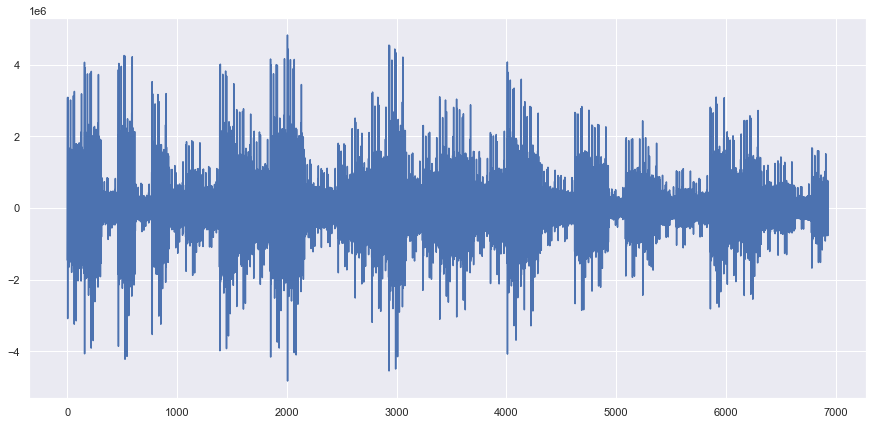

In [59]:
df['Weekly_Sales'].diff().dropna().plot()

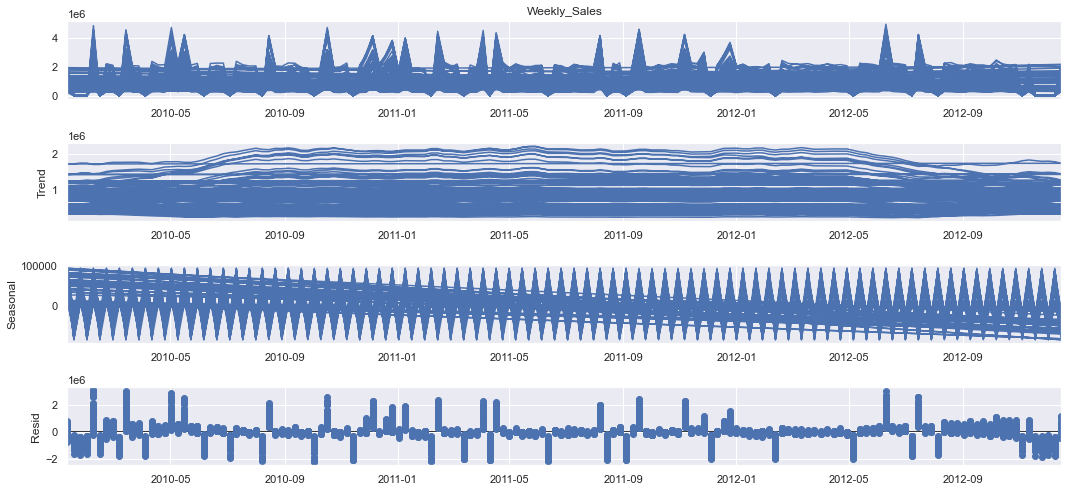

In [60]:
#seasonal Decompose
decomp = seasonal_decompose(df.set_index('Date')['Weekly_Sales'], model='additive', period=52)
decomp.plot()
plt.show()

ACF and PACF plots are used to identify the model's order in ARIMA models. These plots help to find the parameters p and q. Also, we always plot the ACF and PACF plots after making the time series stationary.

ACF - Autocorrelation Function PACF- PArtial Autocorrelation function


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


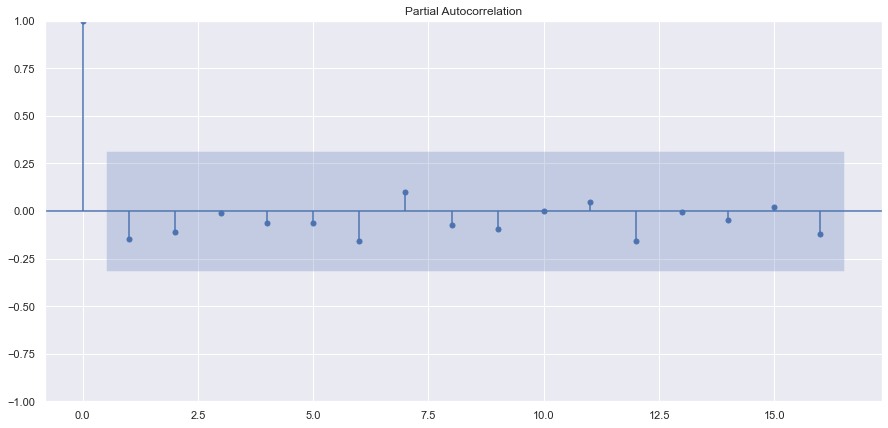

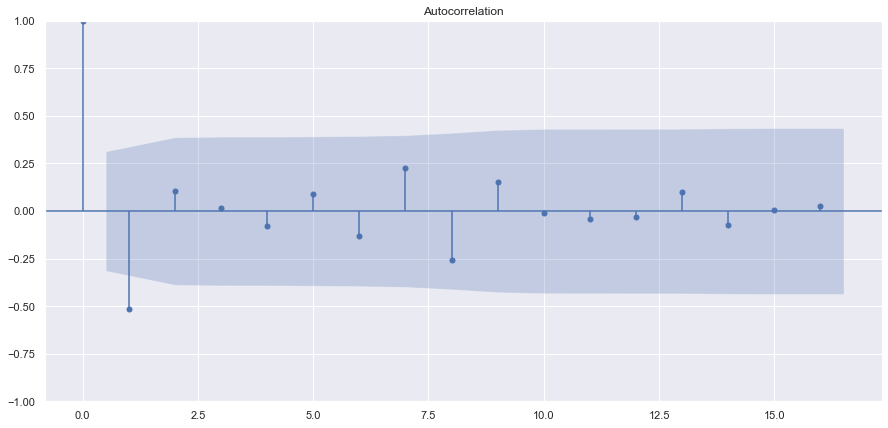

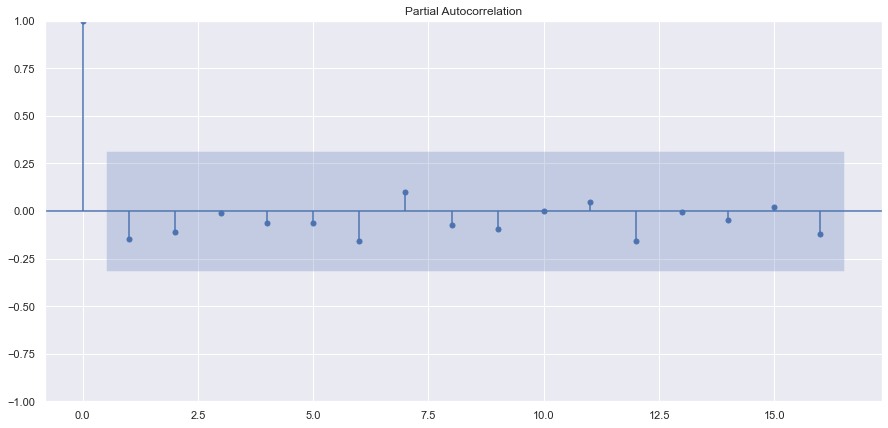

In [61]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Perform differencing
df_diff = df.set_index('Date')['Weekly_Sales'].diff().dropna()

# Plot ACF and PACF of differenced time series
acf_plot = acf(df_diff)
pacf_plot = pacf(df_diff)
plot_acf(acf_plot)
plot_pacf(pacf_plot)


In [62]:
df.shape

(6930, 3)

In [75]:
0.8*df.shape[0]

5544.0

In [81]:
df = df.reset_index()

df.head()

index       Date  Store  Weekly_Sales
0      0 2010-01-10      1    1453329.50
1      1 2010-01-17      1          0.00
2      2 2010-01-24      1          0.00
3      3 2010-01-31      1          0.00
4      4 2010-02-07      1    3087386.42

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                 6918
Model:                 ARIMA(1, 0, 2)   Log Likelihood             -102456.040
Date:                Fri, 12 May 2023   AIC                         204922.079
Time:                        14:24:07   BIC                         204956.289
Sample:                             0   HQIC                        204933.874
                               - 6918                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.731e+05   3.82e-10   2.55e+15      0.000    9.73e+05    9.73e+05
ar.L1          0.9905      0.002    591.782      0.000       0.987       0.994
ma.L1         -1.0365      0.011    -94.466      0.0

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Admin\AppData\Local\Temp\ipykernel_10680\1849211280.py:19: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test - forecast) / test)) * 100


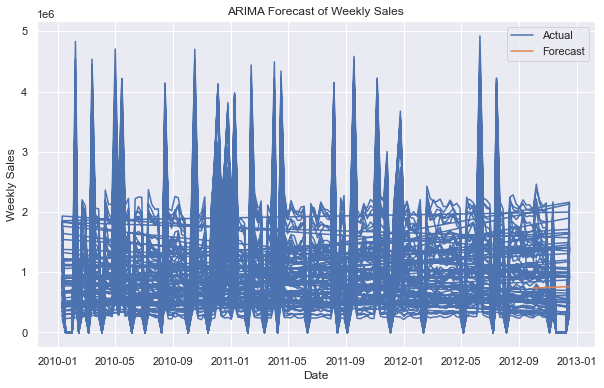

In [82]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Split the data into training and testing sets
train = df.set_index('Date')['Weekly_Sales'].iloc[:-12]
test = df.set_index('Date')['Weekly_Sales'].iloc[-12:]

# Fit an ARIMA model to the training data
model = ARIMA(train, order=(1, 0, 2))
model_fit = model.fit()
print(model_fit.summary())

# Evaluate the model on the testing data
forecast = model_fit.forecast(steps=12)
mse = np.mean((test - forecast) ** 2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - forecast) / test)) * 100
print('RMSE: {:.2f}'.format(rmse))
print('MAPE: {:.2f}%'.format(mape))

# Plot the forecasted values against the actual values
plt.figure(figsize=(10,6))
plt.plot(df.set_index('Date')['Weekly_Sales'], label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('ARIMA Forecast of Weekly Sales')
plt.legend()
plt.show()


In [69]:
df.set_index('Date',inplace=True)

df.head()

Store  Weekly_Sales
Date                           
2010-01-10      1    1453329.50
2010-01-17      1          0.00
2010-01-24      1          0.00
2010-01-31      1          0.00
2010-02-07      1    3087386.42

In [84]:
len(train)+len(test)- 1

6928

In [86]:
df['predict'] = model_fit.predict(start= 2, 
                                    end=len(train)+len(test)- 1, 
                                    dynamic=True)
df[['Weekly_Sales','predict']]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Weekly_Sales        predict
0       1453329.50            NaN
1             0.00            NaN
2             0.00  935210.319076
3             0.00  816806.831853
4       3087386.42  818289.230935
...            ...            ...
6925          0.00  973111.558258
6926          0.00  973111.558258
6927          0.00  973111.558258
6928          0.00  973111.558258
6929     734464.36            NaN

[6930 rows x 2 columns]

<AxesSubplot:>

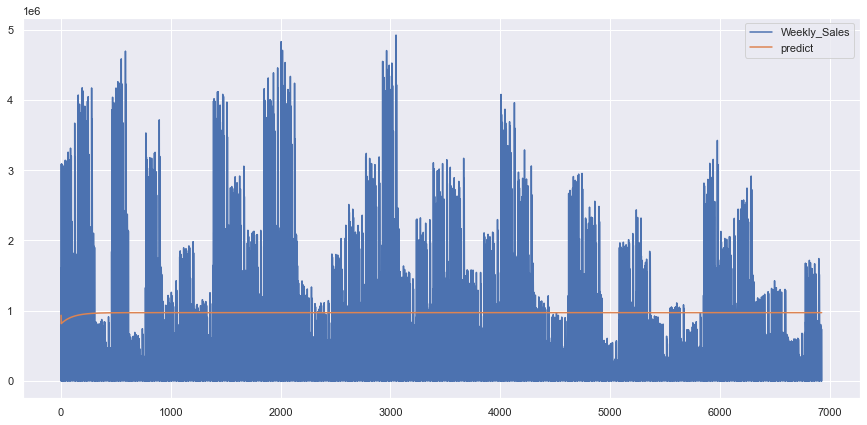

In [87]:
df[['Weekly_Sales','predict']].plot()

In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(1,0,2), seasonal_order=(1,0,2,12))
model = model.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: SARIMAX models require univariate `endog`. Got shape (5544, 3).

In [96]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Select only the 'Weekly_Sales' column from the original DataFrame
train = df[['Date', 'Weekly_Sales']].set_index('Date')

# Fit the SARIMAX model
model = SARIMAX(train, order=(1,0,2), seasonal_order=(1,0,2,12))
model_fit = model.fit()

# Make forecasts and evaluate the model
...


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Ellipsis

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:>

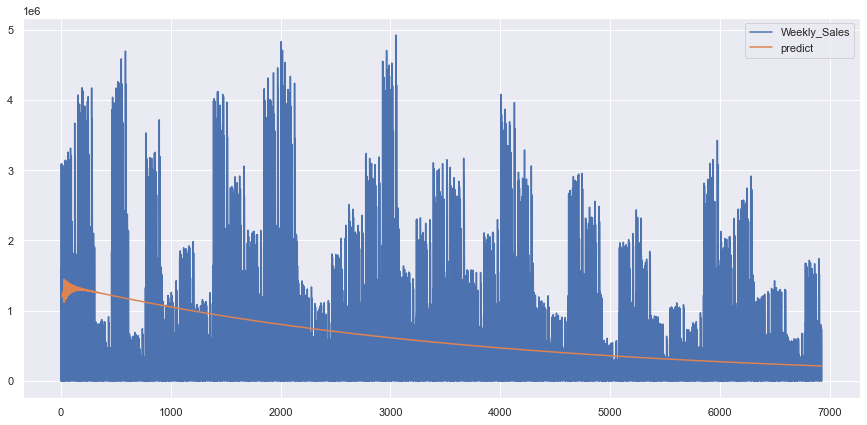

In [97]:
df['predict'] = model_fit.predict(start= 12, 
                                    end=len(train)+len(test)- 1, 
                                    dynamic=True)

df[['Weekly_Sales','predict']].plot()

In [98]:
df[['Weekly_Sales','predict']]

Weekly_Sales        predict
0       1453329.50            NaN
1             0.00            NaN
2             0.00            NaN
3             0.00            NaN
4       3087386.42            NaN
...            ...            ...
6925          0.00  214266.870888
6926          0.00  214209.273812
6927          0.00  214151.692219
6928          0.00  214094.126105
6929     734464.36  214036.575465

[6930 rows x 2 columns]

In [105]:
# #predicting the projections for the next 16 weeks
# forecast = model.forecast(steps=12)
# new_data.plot()
# forecast.plot()

In [102]:
df.shape[0]*0.8

5544.0

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
predict_df = df[5545:6930]
mean_squared_error(predict_df['Weekly_Sales'],predict_df['predict'])
mean_absolute_percentage_error(predict_df['Weekly_Sales'],predict_df['predict'])

2.0514311168628015e+20